In [6]:
# Import Libraries

In [2]:
import warnings

import numpy as np
import missingno as msno
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.pylab as pylab
import sklearn
import re
import nltk
import string
from nltk.text import Text
warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use('bmh')

In [3]:
# Import Dataset

In [67]:
df = pd.read_csv('bank.csv').drop(['job', 'month', 'pdays','education','marital', 'contact', 'poutcome','deposit', 'campaign', 'previous', 'loan', 'housing', 'default'], axis=1)
df.head()

,age,balance,day,duration
0,59,2343,5,1042
1,56,45,5,1467
2,41,1270,5,1389
3,55,2476,5,579
4,54,184,5,673


In [68]:
# Data Information
# Numbers of observations and features
# Features of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       11162 non-null  int64
 1   balance   11162 non-null  int64
 2   day       11162 non-null  int64
 3   duration  11162 non-null  int64
dtypes: int64(4)
memory usage: 348.9 KB


In [69]:
print(f'Number of Observations: {df.shape[0]}')
print(f'Number of Features: {df.shape[1]}')

Number of Observations: 11162
Number of Features: 4


In [70]:
df.columns

Index(['age', 'balance', 'day', 'duration'], dtype='object')

In [18]:
#From these informations we can already see that some features won't be relevant in our exploratory analysis 

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64


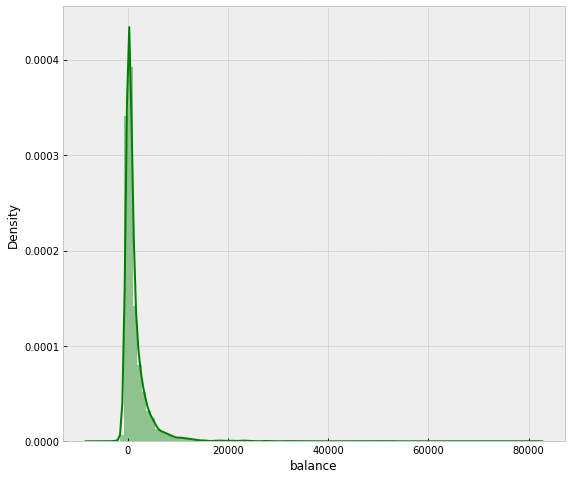

In [71]:
print(df['balance'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['balance'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [5]:
#2.1: Text Cleaning

<AxesSubplot:>

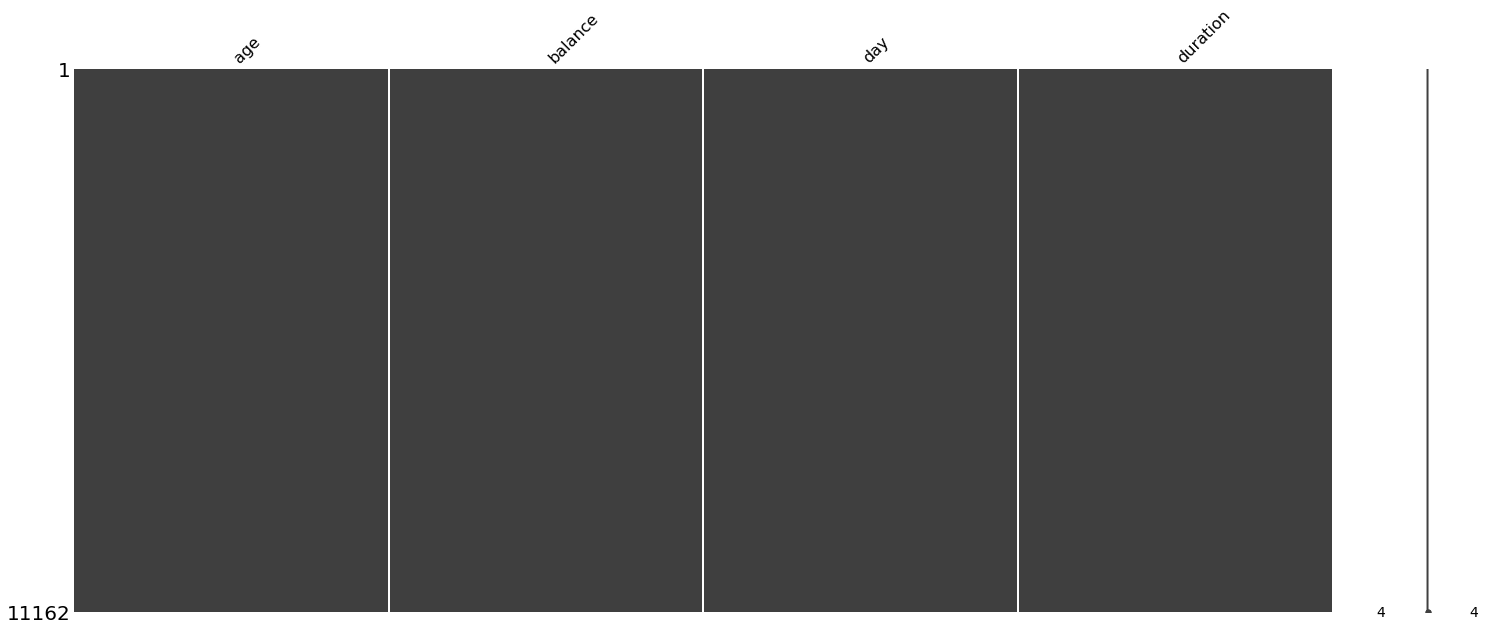

In [72]:
msno.matrix(df)

In [73]:
#Numerical data distribution
#For this part lets look at the distribution of all of the features by ploting them

#To do so lets first list all the types of our data from our dataset and take only the numerical ones:

list(set(df.dtypes.tolist()))

[dtype('int64')]

In [74]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,age,balance,day,duration
0,59,2343,5,1042
1,56,45,5,1467
2,41,1270,5,1389
3,55,2476,5,579
4,54,184,5,673


In [75]:
df.drop("age", axis=1)

,balance,day,duration
0,2343,5,1042
1,45,5,1467
2,1270,5,1389
3,2476,5,579
4,184,5,673
...,...,...,...
11157,1,20,257
11158,733,16,83
11159,29,19,156
11160,0,8,9


In [30]:
#Now lets plot them all:

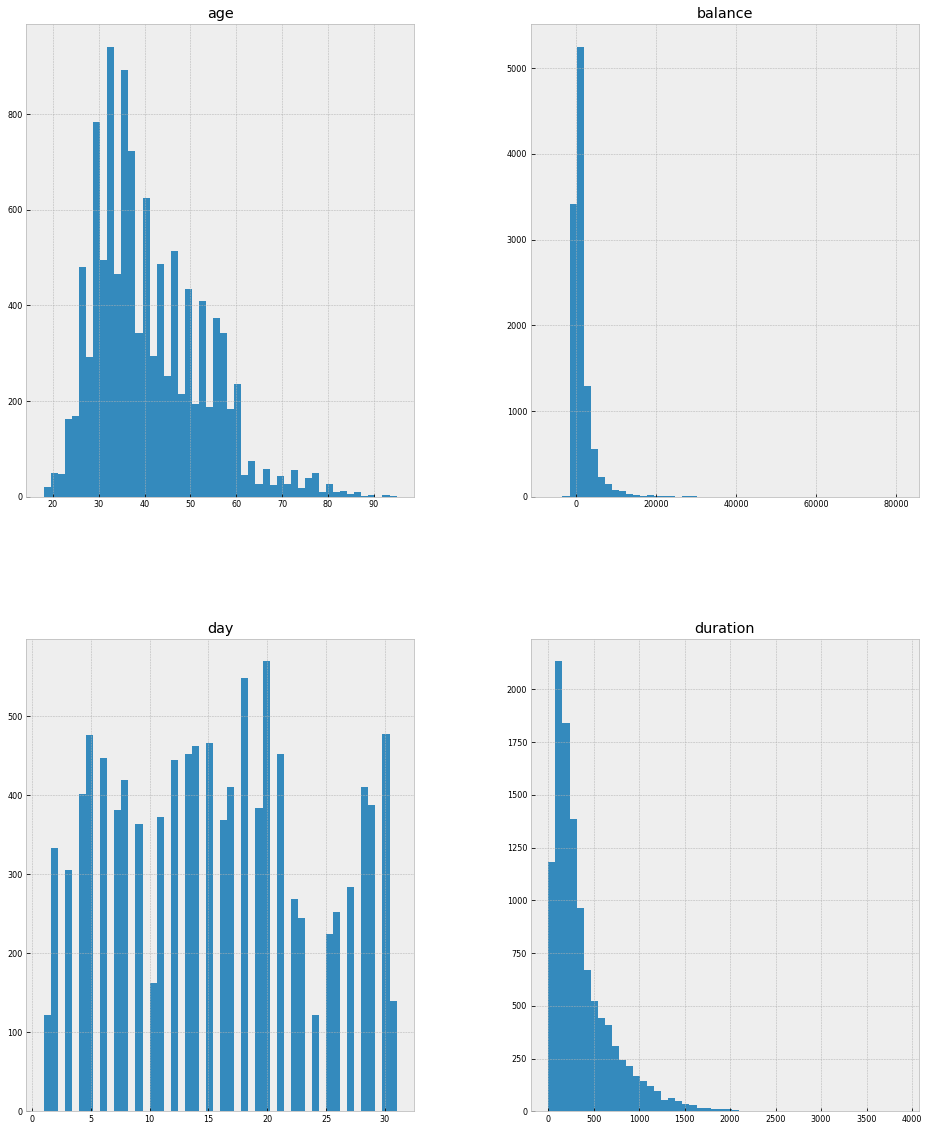

In [76]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

In [ ]:
#Correlation
#Now we'll try to find which features are strongly correlated with balance.

In [77]:
df_num_corr = df_num.corr()['balance'][:-1] # -1 because the latest row is balance
golden_features_list = df_num_corr[abs(df_num_corr) > 0.01].sort_values(ascending=False)
print("There is {} strongly correlated values with balance:\n{}".format(len(golden_features_list), golden_features_list))

There is 3 strongly correlated values with balance:
balance    1.000000
age        0.112300
day        0.010467
Name: balance, dtype: float64


In [78]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [79]:
X = df.drop(columns=['balance'])
y= df['balance']
model=DecisionTreeClassifier()
model.fit(X, y)
predictions = model.predict(X)
model.fit(X,y)
df


,age,balance,day,duration
0,59,2343,5,1042
1,56,45,5,1467
2,41,1270,5,1389
3,55,2476,5,579
4,54,184,5,673
...,...,...,...,...
11157,33,1,20,257
11158,39,733,16,83
11159,32,29,19,156
11160,43,0,8,9


In [81]:
model=DecisionTreeClassifier()
model.fit(X,y)
predictions = model.predict([[90, 85, 95]])
predictions

array([230], dtype=int64)

In [83]:
train_test_split(X, y, test_size=0.1162)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.52)
model=DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = accuracy_score(y_test, predictions)
score

0.010163652024117141